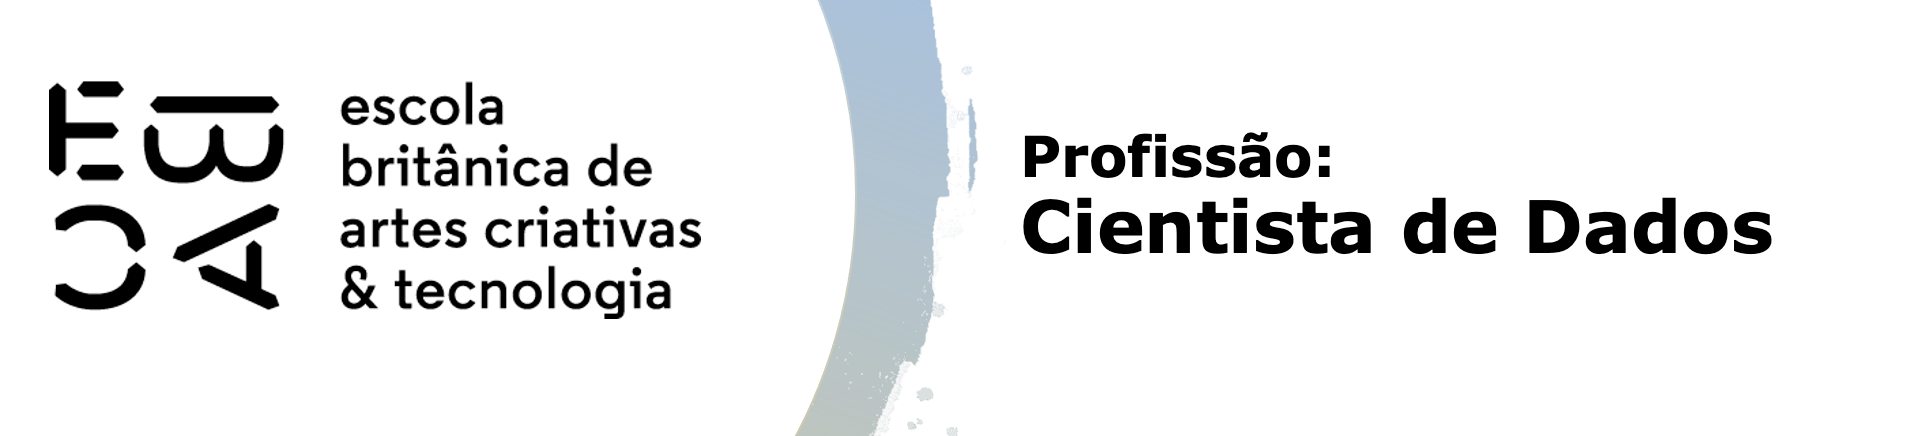

# Probabilidade - Tarefa

In [22]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, t

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

In [6]:
# Parâmetros
mu = 15      # média
sigma = 0.1  # desvio padrão
x = 15.2     # valor a ser analisado

# Calculando Z
z = (x - mu) / sigma

# Calculando a probabilidade acumulada até 15,2 kg
prob = 1 - stats.norm.cdf(z)

print(f"A probabilidade de um pacote ter mais que 15,2 kg é {prob:.4f} ou {prob * 100:.2f}%.")

A probabilidade de um pacote ter mais que 15,2 kg é 0.0228 ou 2.28%.


2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [9]:
# Parâmetros
mu = 15      # média
sigma = 0.1  # desvio padrão
percentil = 0.95  # percentil desejado

# Calculando o percentil de ordem 95%
valor_percentil = stats.norm.ppf(percentil, loc=mu, scale=sigma)

print(f"O percentil de 95% para o peso dos pacotes é {valor_percentil:.4f} kg.")

O percentil de 95% para o peso dos pacotes é 15.1645 kg.


3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [13]:
# Criando o objeto Y
Y = np.linspace(-6, 6, 200)

# Calculando a probabilidade acumulada (CDF) para Y1 (Normal Padrão)
prob_Y1 = stats.norm.cdf(Y, loc=0, scale=1)

# Calculando a probabilidade acumulada (CDF) para Y2 (t-Student com 5 graus de liberdade)
prob_Y2 = stats.t.cdf(Y, df=5)

# Organizando os resultados em um DataFrame para melhor visualização
df_resultados = pd.DataFrame({
    "Y": Y,
    "P(Y1 < Y) - Normal": prob_Y1,
    "P(Y2 < Y) - t-Student": prob_Y2
})

# Exibindo as primeiras linhas do DataFrame
print(df_resultados.head())

          Y  P(Y1 < Y) - Normal  P(Y2 < Y) - t-Student
0 -6.000000        9.865876e-10               0.000923
1 -5.939698        1.427734e-09               0.000966
2 -5.879397        2.058819e-09               0.001011
3 -5.819095        2.958347e-09               0.001058
4 -5.758794        4.235851e-09               0.001108


4. Faça uma visualização gráfica dos dados do item anterior.

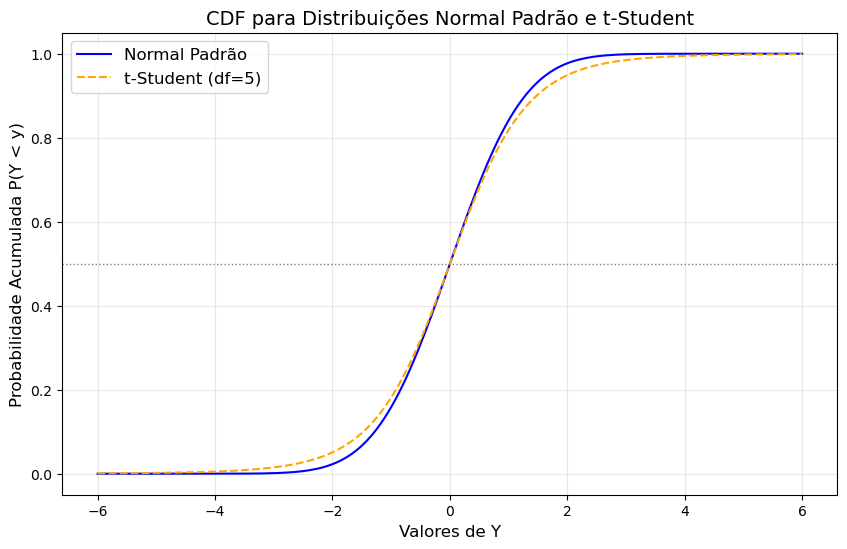

In [17]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(Y, prob_Y1, label="Normal Padrão", color="blue")
plt.plot(Y, prob_Y2, label="t-Student (df=5)", color="orange", linestyle="--")

# Personalizando o gráfico
plt.title("CDF para Distribuições Normal Padrão e t-Student", fontsize=14)
plt.xlabel("Valores de Y", fontsize=12)
plt.ylabel("Probabilidade Acumulada P(Y < y)", fontsize=12)
plt.axhline(0.5, color="gray", linestyle=":", linewidth=1)  # Linha para P=0.5
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Exibir o gráfico
plt.show()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [24]:
# Definir o vetor de probabilidades Y
Y = np.linspace(0, 1, 20)  # 20 valores igualmente espaçados entre 0 e 1

# Percentis para a distribuição Normal Padrão
percentis_normal = norm.ppf(Y)  # Inversa da CDF para a distribuição normal padrão

# Percentis para a distribuição t-Student com 5 graus de liberdade
percentis_tstudent = t.ppf(Y, df=5)  # Inversa da CDF para t-Student com 5 graus de liberdade

# Exibir os resultados
print("Percentis para a distribuição Normal Padrão:")
print(percentis_normal)

print("\nPercentis para a distribuição t-Student (df=5):")
print(percentis_tstudent)

Percentis para a distribuição Normal Padrão:
[       -inf -1.61985626 -1.25211952 -1.00314797 -0.80459638 -0.63364
 -0.47950565 -0.33603814 -0.19920132 -0.06601181  0.06601181  0.19920132
  0.33603814  0.47950565  0.63364     0.80459638  1.00314797  1.25211952
  1.61985626         inf]

Percentis para a distribuição t-Student (df=5):
[       -inf -1.97489346 -1.4358593  -1.11439619 -0.87612441 -0.68067217
 -0.51027663 -0.35532778 -0.20979907 -0.06939058  0.06939058  0.20979907
  0.35532778  0.51027663  0.68067217  0.87612441  1.11439619  1.4358593
  1.97489346         inf]


6. Faça um gráfico com os dados do item anterior.

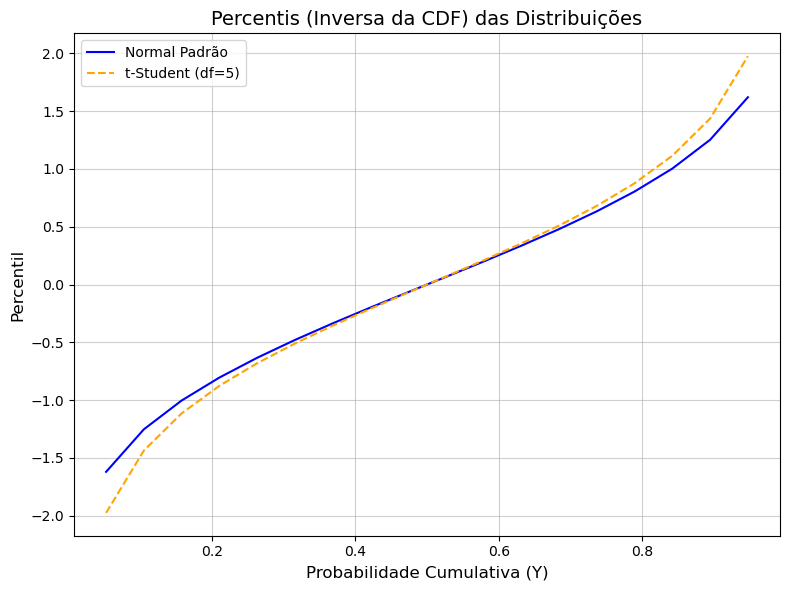

In [28]:
# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(Y, percentis_normal, label="Normal Padrão", color='blue')
plt.plot(Y, percentis_tstudent, label="t-Student (df=5)", linestyle='--', color='orange')

# Adicionar título e rótulos
plt.title("Percentis (Inversa da CDF) das Distribuições", fontsize=14)
plt.xlabel("Probabilidade Cumulativa (Y)", fontsize=12)
plt.ylabel("Percentil", fontsize=12)

# Adicionar legenda
plt.legend()

# Adicionar grade
plt.grid(alpha=0.6)

# Mostrar o gráfico
plt.tight_layout()
plt.show()